# Task 1

$S = 2\pi r h + 2\pi r^2$


$V = \pi r^2h$


$h = \frac{V}{\pi r^2}$


$S = 2\pi r h + 2\pi r^2 = \frac{2V}{r}+2\pi r^2$


$\frac{\partial S}{\partial r} = -\frac{2V}{r^2}+4\pi r = 0$


$2V = 4\pi r^3$


$r = \sqrt[3]{\frac{V}{2\pi}}$


$h = 2^{\frac{2}{3}}\frac{V^{\frac{1}{3}}}{\pi^{\frac{1}{3}}}$

# Task 2

$f(x_1,x_2) = \frac{3}{2}(x_1^2+x_2^2) + (1+a)x_1x_2-(x_1+x_2)+b$


$\frac{\partial f}{\partial x_1} = 3x_1 + (1+a)x_2 - 1$


$\frac{\partial f}{\partial x_2} = 3x_2 + (1+a)x_1 - 1$


$\frac{\partial^2 f}{\partial x_1^2} = 3$


$\frac{\partial^2 f}{\partial x_2^2} = 3$


$\frac{\partial^2 f}{\partial x_1x_2} = 1+a$


To be the minimum: $\nabla f = 0$ & $\Delta_1 > 0$ & $\Delta_2 > 0$


$\Delta_1 = 3 > 0$


$\nabla f = 3x_1 + (1+a)x_2 - 1 = 3x_2 + (1+a)x_1 - 1 = 0$


$\Delta_2 = 9 - (1+a)^2 = 8-2a-a^2 > 0$


$a_1 = -4, a_2 = 2$


$\Delta_2 = -(a+4)(a-2) > 0 \Rightarrow a \in (-4,2), b \in \mathcal{R}$

Solution is unique with $a \in (-4,2), b \in \mathcal{R}$ because $\frac{\partial f}{\partial x_1}=\frac{\partial f}{\partial x_2}$

# Task 3

In [200]:
import numpy as np
import pandas as pd
import math
import copy

In [201]:
def mishas_bird(x):
    if (x[0] + 5)**2 + (x[1] + 5)**2 < 25:
        return (np.sin(x[1])*np.exp((1-np.cos(x[0]))**2)+np.cos(x[0])*np.exp((1-np.sin(x[1]))**2)+(x[0]-x[1])**2)
    else:
        return  np.inf

In [266]:
def nelder_mead(f, x_start,
                step=0.25, max_iter=500,
                alpha=1., gamma=0.5, betta=2, sigma=0.5, no_improve_thr = 10e-5):

    func_value = f(x_start)
    coordinates = [[x_start, func_value]]
    polygons = []
    for i in range(2):
        
        x = copy.copy(x_start)
        x[i] = x[i] + step
        score = f(x)
        coordinates.append([x, score])
    array_coordinates = coordinates.copy()
    polygons.append(array_coordinates)
    # simplex iter
    iters = 0
    prev_best = np.inf
    while 1:
        # order
        
        coordinates.sort(key=lambda coordinate: coordinate[1])
        best = coordinates[0][1]
        # break after max_iter
        if max_iter and iters >= max_iter:
            return coordinates, polygons, 3+2*iters
        iters += 1
        
        if best < prev_best - no_improve_thr:
            prev_best = best
        else:
            return coordinates, polygons, 3+2*iters
        
        # centroid
        x0 = [0., 0.] 
        for tup in coordinates[:-1]:
            for i, c in enumerate(tup[0]):
                x0[i] += c / (len(coordinates)-1)

        # reflection
        xr = x0 + alpha*(x0 - coordinates[-1][0])
        rscore = f(xr)
        if coordinates[0][1] <= rscore < coordinates[-2][1]:
            del coordinates[-1]
            coordinates.append([xr, rscore])
            
            coordinates.sort(key=lambda coordinate: coordinate[1])
            array_coordinates = coordinates.copy()
            polygons.append(array_coordinates)
            continue

        # expansion
        if rscore < coordinates[0][1]:
            xe = x0 + gamma*(x0 - coordinates[-1][0])
            escore = f(xe)
            if escore < rscore:
                del coordinates[-1]
                coordinates.append([xe, escore])
                
                coordinates.sort(key=lambda coordinate: coordinate[1])
                array_coordinates = coordinates.copy()
                polygons.append(array_coordinates)
                continue
            else:
                del coordinates[-1]
                coordinates.append([xr, rscore])
                
                coordinates.sort(key=lambda coordinate: coordinate[1])
                array_coordinates = coordinates.copy()
                polygons.append(array_coordinates)
                continue

        # contraction
        xc = x0 + betta*(x0 - coordinates[-1][0])
        cscore = f(xc)
        if cscore < coordinates[-1][1]:
            del coordinates[-1]
            coordinates.append([xc, cscore])
            
            coordinates.sort(key=lambda coordinate: coordinate[1])
            array_coordinates = coordinates.copy()
            polygons.append(array_coordinates)
            continue

        # reduction
        x1 = coordinates[0][0]
        nres = []
        for tup in coordinates:
            redx = x1 + sigma*(tup[0] - x1)
            score = f(redx)
            nres.append([redx, score])
        coordinates = nres
        
        coordinates.sort(key=lambda coordinate: coordinate[1])
        array_coordinates = coordinates.copy()
        polygons.append(array_coordinates)
        





In [267]:
x = np.linspace(-10, 0, 400)

X, Y = np.meshgrid(x, x)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = mishas_bird(np.array([X[i, j], Y[i, j]]))

In [268]:
coordinates, polygons, iterations = nelder_mead(mishas_bird, np.array([-4.5,-1.75]))

In [269]:
len(coordinates)
len(polygons)

2

In [270]:
for simplex in polygons:
    print(simplex)
    break

[[array([-4.5 , -1.75]), -7.497833277279341], [array([-4.25, -1.75]), -24.56495275118634], [array([-4.5, -1.5]), -6.715522536174728]]


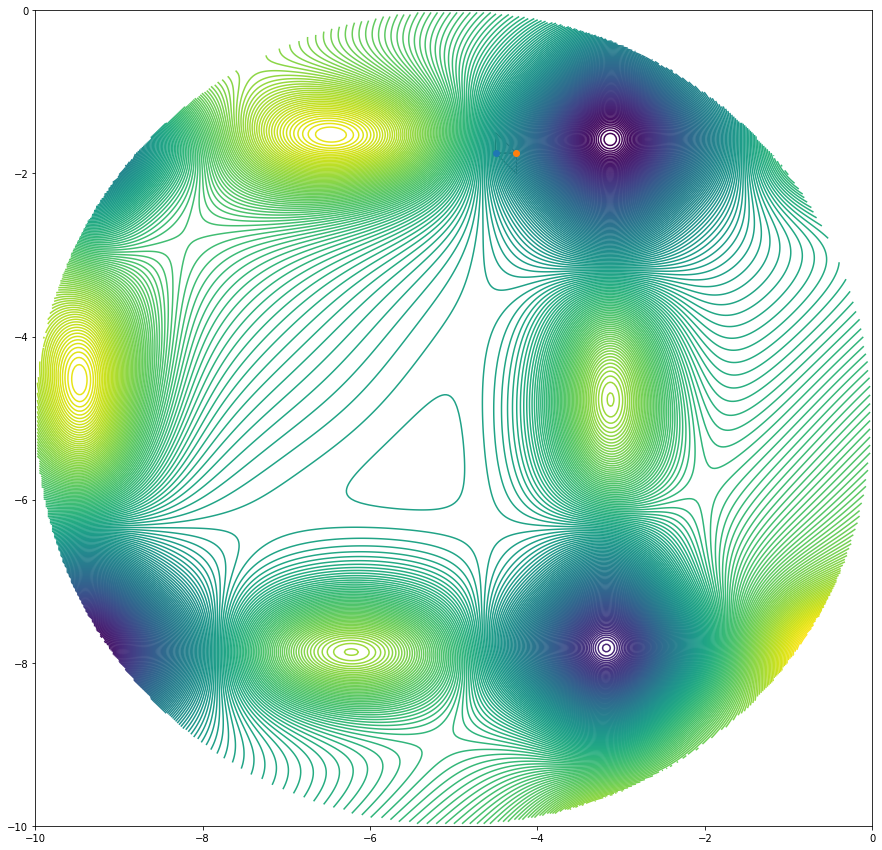

In [271]:

from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.contour(X, Y, Z, 200)
for coordinate in polygons: 
    plt.plot(coordinate[0][0][0], coordinate[0][0][1], 'o')
    array = []
    for simplex in coordinate:
        array.append(simplex[0])
    t1 = plt.Polygon(array, fill=False)
    plt.gca().add_patch(t1)

starting point: [-6,-4], corresponding point:  [-5. -5.]


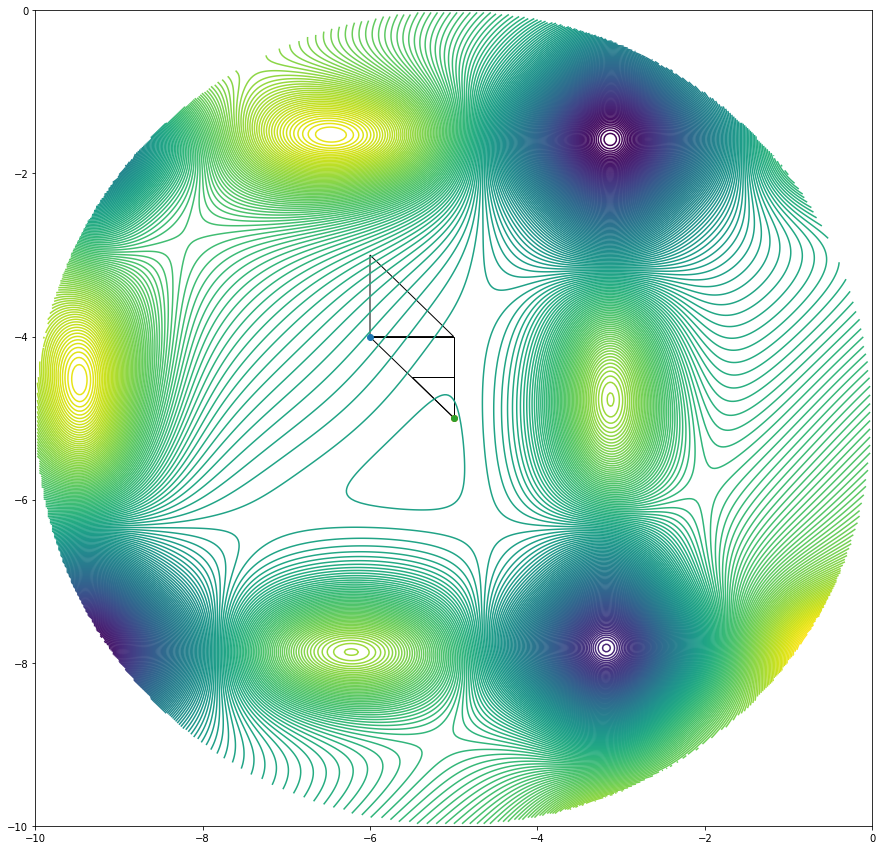

In [272]:
coordinates, polygons, iterations = nelder_mead(mishas_bird, np.array([-6,-4]))
plt.figure(figsize=(15,15))
plt.contour(X, Y, Z, 200)
for coordinate in polygons: 
    plt.plot(coordinate[0][0][0], coordinate[0][0][1], 'o')
    array = []
    for simplex in coordinate:
        array.append(simplex[0])
    t1 = plt.Polygon(array, fill=False)
    plt.gca().add_patch(t1)
    
print('starting point: [-6,-4], corresponding point: ', coordinates[0][0])

starting point: [-2,-3], corresponding point:  [-3. -2.] , iterations:  9


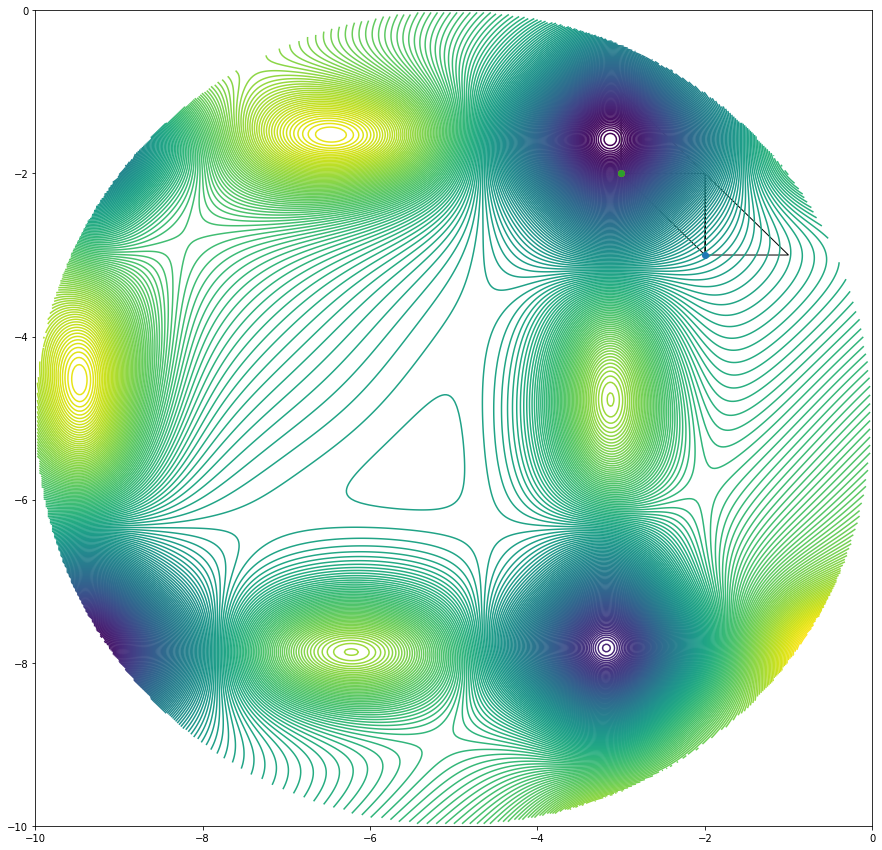

In [273]:
coordinates, polygons, iterations = nelder_mead(mishas_bird, np.array([-2,-3]))
plt.figure(figsize=(15,15))
plt.contour(X, Y, Z, 200)
for coordinate in polygons: 
    plt.plot(coordinate[0][0][0], coordinate[0][0][1], 'o')
    array = []
    for simplex in coordinate:
        array.append(simplex[0])
    t1 = plt.Polygon(array, fill=False)
    plt.gca().add_patch(t1)
    
print('starting point: [-2,-3], corresponding point: ', coordinates[0][0], ', iterations: ', iterations)

starting point: [-3,-9], corresponding point:  [-3 -8]


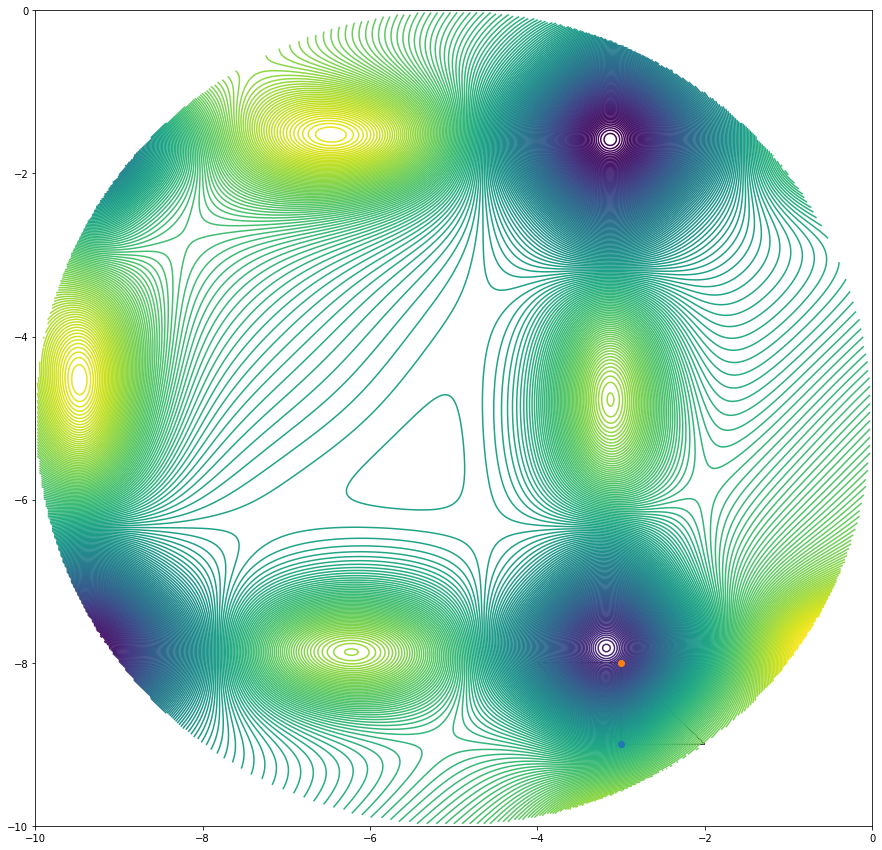

In [274]:
coordinates, polygons, iterations = nelder_mead(mishas_bird, np.array([-3,-9]))
plt.figure(figsize=(15,15))
plt.contour(X, Y, Z, 200)
for coordinate in polygons: 
    plt.plot(coordinate[0][0][0], coordinate[0][0][1], 'o')
    array = []
    for simplex in coordinate:
        array.append(simplex[0])
    t1 = plt.Polygon(array, fill=False)
    plt.gca().add_patch(t1)
    
print('starting point: [-3,-9], corresponding point: ', coordinates[0][0])

starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  1 gamma =  0.25
starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  1 gamma =  0.5
starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  1 gamma =  1
starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  2 gamma =  0.25
starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  2 gamma =  0.5
starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  2 gamma =  1
starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  4 gamma =  0.25
starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  4 gamma =  0.5
starting point: [-3,-5], corresponding point:  [-2 -5] alpha =  0.5 betta =  4 gamma =  1
starting point: [-3,-5], corresponding point:  [-2. -4.] alpha =  1 betta =  1 gamma =  0.25
starting point: [-3,-5], corresponding point:  [-2. -4.] alpha =  1 betta =  1 gam

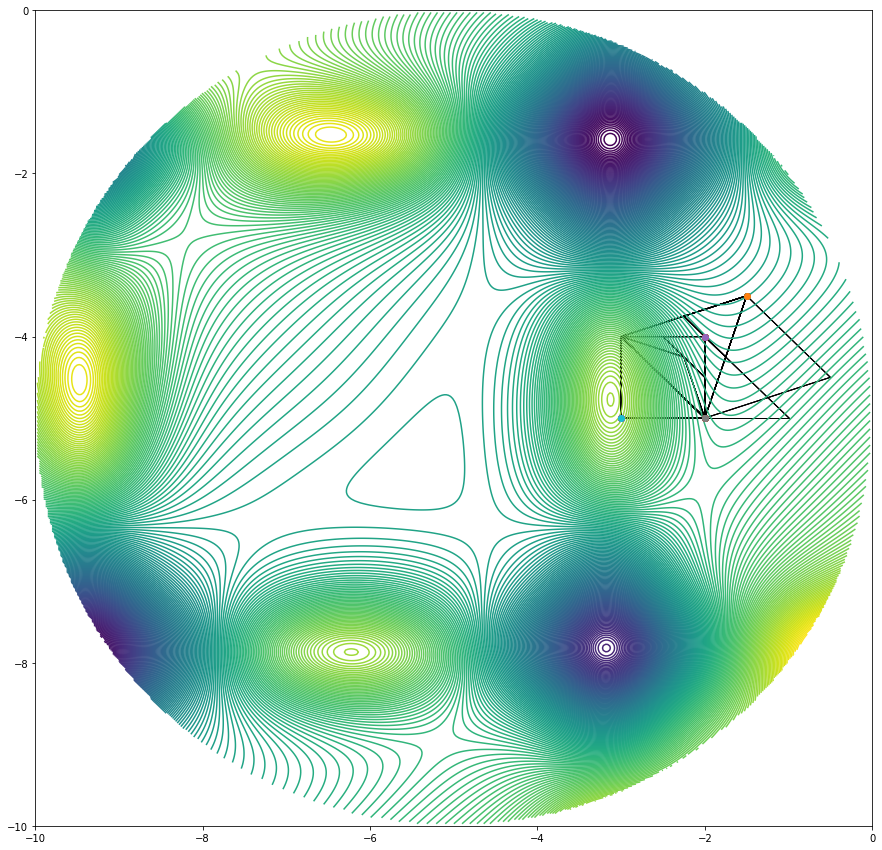

In [275]:
alphas = [0.5, 1, 2]
bettas = [1, 2, 4]
gammas = [0.25, 0.5, 1]
plt.figure(figsize=(15,15))
plt.contour(X, Y, Z, 200)
for alpha in alphas:
    for betta in bettas:
        for gamma in gammas:
            coordinates, polygons, iterations = nelder_mead(mishas_bird, np.array([-3,-5]), alpha=alpha, betta=betta, gamma=gamma, step=1)
            
            for coordinate in polygons: 
                plt.plot(coordinate[0][0][0], coordinate[0][0][1], 'o')
                array = []
                for simplex in coordinate:
                    array.append(simplex[0])
                t1 = plt.Polygon(array, fill=False)
                plt.gca().add_patch(t1)

            print('starting point: [-3,-5], corresponding point: ', coordinates[0][0], 'alpha = ', alpha, 'betta = ', betta, 'gamma = ', gamma)

# Task 4

In [279]:
x_start = [-2,-3]
def coord_descent(f, x_start, max_iter=500,
                alpha=0.5, no_improve_thr = 10e-5):

    f_1 = f(x_start)
    f_0 = np.inf
    x_1 = x_start.copy()
    x_0 = np.inf
    iters = 0
    
    track = np.zeros([max_iter+1, 2])
    while 1:
        coordinate = iters % 2
        track[iters,:] = x_1.copy()
        
        bubble = x_1.copy()
        
        x_1[coordinate] = x_1[coordinate] + 0.1*alpha
        
        grad = f_1 - f(x_1)
        
        x_0 = bubble
        
        bubble[coordinate] = bubble[coordinate] + 0.5*alpha*grad
#         print(x_1)
        f_1 = f(x_1)
        
        if (f_0 - f_1 < no_improve_thr) or ((x_1[1]-x_0[1])**2+(x_1[0]-x_0[0])**2) < no_improve_thr :
            
            track = track[np.nonzero(track[:,0])[0]]
            return x_1, track, iters
        
#         history_x[iterations,:] = x_curr.copy()
#         coord_to_minimize = np.mod(iterations, 2)
#         s_m = x_curr.copy()
#         s_m[coord_to_minimize] += 0.2*alpha[coord_to_minimize]
#         f_grad = curr_f - func(s_m)
#         prev_f = curr_f
#         x_past = x_curr.copy()
#         x_curr[coord_to_minimize] += 0.5 * alpha[coord_to_minimize] * f_grad
#         curr_f = func(x_curr)
#         iterations += 1
#     history_x = history_x[np.nonzero(history_x[:,0])[0]]
#     return x_curr, history_x, iterations
        
        
        
        if max_iter and iters >= max_iter:
            track = track[np.nonzero(track[:,0])[0]]
            return x_1, track, iters
        iters += 1





In [280]:
x_end, track, iterations_grad = coord_descent(mishas_bird, x_start)

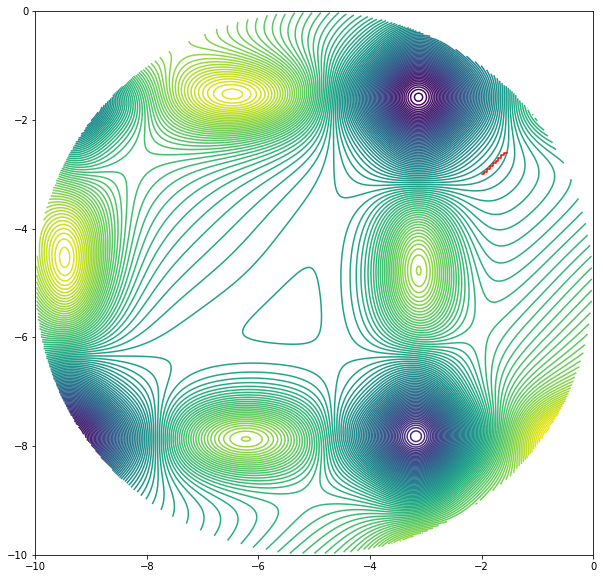

In [281]:
plt.figure(figsize=(10,10))
plt.contour(X, Y, Z_raw, 100)
plt.plot(track[:,0], track[:,1], 'r')

In [284]:
print(x_end, ', iterations:', iterations_grad, '- coord descent')
print( '[-3. -2.] , iterations:  9 - NM algotithm')

[-1.5499999999999996, -2.5500000000000016] , iterations: 17 - coord descent
[-3. -2.] , iterations:  9 - NM algotithm


1) Different ending points.

2) Hard to compare, because of 1). 